In [1]:
from __future__ import division
import os
import pymongo as pm ## first establish ssh tunnel to server where database is running
import base64
import numpy as np
from numpy import *
import PIL
from PIL import Image, ImageOps
import base64
import matplotlib
%matplotlib inline
from matplotlib import pylab, mlab, pyplot
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
from matplotlib.path import Path
import matplotlib.patches as patches
import cv2
import pandas as pd
from svgpathtools import parse_path
import svg_distance_helpers as rsh
import svg_render_helpers as rrh

#### directory and file hierarchy

In [2]:
# directory & file hierarchy
analysis_dir = os.getcwd()
ref_dir = os.path.join(analysis_dir, 'reference')
data_dir = os.path.join(analysis_dir,'tracing')

### read in tracing and reference data

In [3]:
reload(rsh)

<module 'svg_distance_helpers' from 'svg_distance_helpers.pyc'>

In [4]:
reload(rsh)
# read in tracing data
fpath = os.path.join(data_dir, 'test40.png')
tra = rsh.load_preprocess_tracing(fpath, threshold = 100, img_size = 56, invert=True)
print 'Number of pixels marked in the tracing = {}'.format(np.sum(tra==255))

# read in reference data
fpath = os.path.join(ref_dir, 'square_50.png')
ref = rsh.load_preprocess_tracing(fpath, threshold = 50, img_size = 56, invert=False)
print 'Number of pixels marked in the reference = {}'.format(np.sum(ref==255))

Number of pixels marked in the tracing = 93
Number of pixels marked in the reference = 92


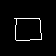

In [5]:
Image.fromarray(tra)

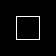

In [8]:
Image.fromarray(ref)

### apply transform and minimize KL between tracing and reference

In [18]:
img_ref = ref/255
img_draw = tra/255

In [ ]:
reload(rsh)
loss, final_draw, product, weights, bias = rsh.minimize_error_soft_index(img_ref, img_ref)
print('Loss: {}   Weights:  {}   Bias: {}'.format(loss, weights, bias))

step: 0 of 1000 | loss: 0.178975209594 | weights: [[1.0003085e+00 4.9266968e-10]
 [1.5832485e-11 1.0003085e+00]] 
step: 10 of 1000 | loss: 4.64412212372 | weights: [[ 0.92702186 -0.09628707]
 [-0.09627899  0.92702997]] 
step: 20 of 1000 | loss: 4.64762687683 | weights: [[ 0.93429726 -0.09869675]
 [-0.10204817  0.9312664 ]] 
step: 30 of 1000 | loss: 4.61966180801 | weights: [[ 0.93008006 -0.10386329]
 [-0.10125852  0.9339999 ]] 
step: 40 of 1000 | loss: 4.64530420303 | weights: [[ 0.9362393  -0.10054561]
 [-0.10369971  0.9314055 ]] 
step: 50 of 1000 | loss: 4.6279168129 | weights: [[ 0.93338734 -0.10145687]
 [-0.10240125  0.93144554]] 
step: 60 of 1000 | loss: 4.63962936401 | weights: [[ 0.93646866 -0.10450611]
 [-0.1015712   0.9334806 ]] 
step: 70 of 1000 | loss: 4.61544179916 | weights: [[ 0.93439513 -0.10591932]
 [-0.10311057  0.9315931 ]] 
step: 80 of 1000 | loss: 4.63548183441 | weights: [[ 0.9325175  -0.10676827]
 [-0.10193596  0.93601125]] 
step: 90 of 1000 | loss: 4.61354827881 

In [16]:
xform_tracing_array = product.data.numpy()
xform_tracing_255 = np.uint8(np.round(xform_tracing_array)*255)
xform_tracing_im = Image.fromarray(xform_tracing_255)

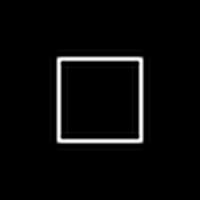

In [17]:
xform_tracing_im.resize((200,200),Image.ANTIALIAS)

In [ ]:
orig_tracing_im = Image.fromarray(np.uint8(img_draw*255))
orig_tracing_im.resize((200,200),Image.ANTIALIAS)

In [ ]:
orig_ref_im = Image.fromarray(np.uint8(img_ref*255))
orig_ref_im.resize((200,200),Image.ANTIALIAS)

In [ ]:
# reload(rsh)
# # ref = np.array([[0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1]])
# # draw = np.array([[0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1], [0,0,0,1,0,0,1]])

# ref = np.array([[0,0,1],[0,0,1],[0,0,0]])
# draw = np.array([[0,1,0],[0,1,0],[0,0,0]])

# loss, final_draw, product, weights, bias = rsh.minimize_error_soft_index(ref, draw)
# print weights
# print bias
# print product.long()
# print final_draw

In [ ]:
kl = nn.KLDivLoss()
loss = kl(product, img_ref) * 100